In [176]:
%matplotlib inline
from pylab import *

import detectorgeometry as geom
reload(geom)

import detectorgeometry_trap as geom_trap
reload(geom_trap)

<module 'detectorgeometry_trap' from 'detectorgeometry_trap.py'>

In [177]:
sources = np.linspace(0,80,10)
for i in range(0,len(sources)):
    theta_src = radians(sources[i]) #radians
    h = 35.5 #km
    R = 6356. # km
    theta_view = radians(1) #degrees
    N = 10000000 # number of samples
    E_nu = 19 #log energy in eV of incident neutrino 

    # using the class
    area1 = geom.Area(theta_src,h,R,theta_view, N)
    area2 = geom_trap.Area(theta_src,h,R,theta_view, N)

    earth_t_min, earth_t_max, phi_E_min, phi_E_max = area2.earth_patch(theta_src, area2.phi_src, theta_view)
    t_e,phi_e = area2.earth_locs(earth_t_min, earth_t_max, phi_E_min, phi_E_max)
    e_x,e_y,e_z = area2.coords(t_e, phi_e)
    r_x, r_y,r_z = area2.coords(theta_src, area2.phi_src+np.pi)
    angles = area2.view_angle_det(e_x,e_y,e_z,r_x, r_y,r_z)
    dot = area2.dot_prod(e_x,e_y,e_z,r_x, r_y,r_z)
    trap_area, t_src, ret_phi_e, ret_t_e= area2.event_retention()

    print area1.degree_eff_area(), trap_area

1.686369293156364 0.0
1.253423437735289 0.4782547077984726
2.0132360851181517 0.9666211238552314
2.740978064128275 1.4542176152319046
1.8164124158205759 1.8288121154943238
2.2133943819882314 2.379711522286867
3.0486502293713285 3.4195750258351745
5.464335109833366 5.682377279515809
13.582381073969547 12.136749019113733
66.11606120909141 50.68151889476828


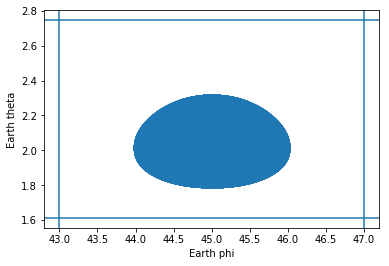

In [178]:
plt.scatter(degrees(ret_phi_e), degrees(ret_t_e),s=1)
#plt.xlim(degrees(phi_E_min)-0.05,degrees(phi_E_max)+0.05)
#plt.ylim(degrees(earth_t_min)-0.05, degrees(earth_t_max)+0.05)
plt.xlabel("Earth phi")
plt.ylabel("Earth theta")
ax = plt.axes()
ax.axhline(degrees(earth_t_min))
ax.axhline(degrees(earth_t_max))
ax.axvline(degrees(phi_E_min))
ax.axvline(degrees(phi_E_max))
plt.show()